<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Data Science</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>Bio Data-Science</b></font></div>
        </td>
    </tr>
</table>

---

# 6 Learning and Accuracy Functions

In this notebook, You will see how gradient descent can be implemented in Python. Gradient descent is a very powerful heuristic for all kinds of optimization problems. Whenever, You will used modern machine learning techniques You are likely to be using an adaptation of the gradient descent algorithm. Hence, it will be very useful to see what happens in the background.

You can find the source of this code [here](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
).



## 6.1 Gradient Descent

First, we will import the necessary libraries.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

### Creation of  Sample Data
Next, we create some data with two parameters $θ_j$ - which is a linear model with one feature $x$ and a bias $θ_0$:

- $θ_0=4$
- $θ_1=3$
 
For instance, this could be a line 
- $y(x)=4+3 \cdot x$

or written as a linear regession model, as we did before.
- $y=\beta_0 + \beta_1 x$
- $y=\theta_0 + \theta_1 x$

Note, that we could also write that using vectors in a matrix multiplication. This is how, we will implement it in the Python code.

$y  = \begin{bmatrix}\theta_0 & \theta_1\end{bmatrix} \cdot \begin{bmatrix} 1 \\ x \end{bmatrix}$

Next, we add some Gaussian noise to the data (an error which is normally distributed).


In [50]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

Let's plot our data to check the relation between $X$ and $Y$

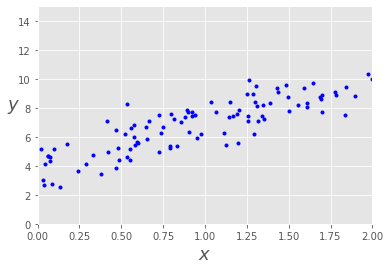

In [51]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

### Analytical way of Linear Regression

First, we fit a [linear regression model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), as we did in the last lectures:

In [52]:
from sklearn.linear_model import LinearRegression

# Define, that we want to take a linear regression as a model f
reg = LinearRegression()

# Fitting Simple Linear Regression to the test set
reg.fit(X, y)

print(reg.intercept_)
print(reg.coef_)

[4.02533424]
[[2.94830012]]


This is close to our real $\theta$ which are 4 and 3. It cannot be perfectly accurate due to the noise I have introduced in data. For instance, we can make a prediction for $x=0$ an a $x=2$.

In [53]:
X_new = np.array([[0],[2]])
y_predict = reg.predict(X_new)
y_predict

array([[4.02533424],
       [9.92193448]])

Let's plot prediction line with calculated $\theta$ values.

(0.0, 2.0, 0.0, 15.0)

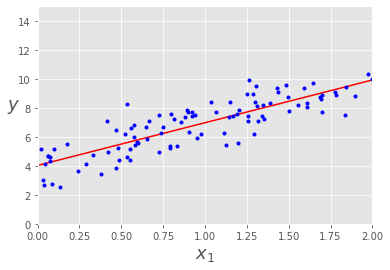

In [54]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

### Gradient Descent


We know, that this works approach works well for linear model, as the minimum for the $RSS$ cost function has a analytical solution. 

Next, we will show how we can use gradient descent to reach an almost identical solution. 


#### Cost Function & Gradients
The equation for calculating cost function and gradients are as shown below.

Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions.


**Cost Fuction**

We use the well known $RSS$ a the core of our cost funtion. Note, that we add a constant factor ($\frac{1}{2n}$) where $n$ is the number of observations in the training set. This does not change anything substantially (as it is only a constant factor) but makes the gradients a little bit nicer to look at.

$$J(θ)=\frac{1}{2n}RSS$$
$$J(θ)=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2$$


Here You see the function, that calculates the costs on a data set with the predictors ($X$) and the predicted variable $y$ given an vector of $θ$.
 



✍️ **Task**

Write a comment `#` behind each line of the code, to describe what happens. Have a look at the pseudo algorithm from the lecture.

In [55]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    n = len(y) # Stores the number of observations the the data
    
    predictions = X.dot(theta) # ...
    cost = (1/2*n) * np.sum(np.square(predictions-y)) # ...
    return cost

In [56]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    n = len(y) # Stores the number of observations the the data
    
    predictions = X.dot(theta) # Calculates the predictions using the current thetas and a matrix multiplication
    cost = (1/2*n) * np.sum(np.square(predictions-y)) # Cacluates the cost function
    return cost # returns the cost function

**Gradient**

If we look at our cost function $J(θ)$, it looks something like the graph below. We are looking for the minimal $J(θ)$ in the middle and the value $J(θ)$ depends on $θ$ (which is $θ_1$ and $θ_1$) which You can imagine on the x and y-axis of the graph:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/512px-Gradient_descent.svg.png)


To reach the minimum in the center of the graph, we can take an iterative approach. Imagine the want to find the deepest point of a valley. We could start at a random position and evaluate our surroundings. When we find the directions of the steepest decline, we take a step in this direction. We can describe this approach in a mathematical way:

If we would have only one $\theta$, we would find the direction towards the minimum by creating the derivative:

$$\frac{d J(θ)}{d θ}$$

If the derivative was positive, we would go to the left, otherwise to the rigth to find the minimum.

As we have more than one $\theta$, we need more instructions on how to move towards the minimum. Therefore, we need the partial derivatives in all directions ($θ_j$) to guide us to the minimum.

We can calculate the partial derivatives by:

$$\frac{\partial J(θ)}{\partial θ_j}= \begin{bmatrix}
\frac{\partial J(θ)}{\partial θ_0}  \\
\frac{\partial J(θ)}{\partial θ_1} \end{bmatrix}$$


$$\frac{\partial J(θ)}{\partial θ_j}=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i}) \cdot X^{(i)}_j$$

We do not have to solve this now, but You might recognize that this applies the chain rule and therefore the $\frac{1}{2}$ is gone in the derivatives.

As we take a deeper look into the partial derivatives for the cost function of linear regression, we see hat it depends on the error, we make with the current model (left side of the multiplication) and the vector of parameters input variables, that belong to the current parameter $\theta_j$.

If we find, that the gradient of the cost function is negative, we want to make a step in this direction on the next iteration. 

The next step we take (or the adjustment in all $\theta_j$) can be described by:

$$\theta_j: \theta_j - \alpha \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i}) \cdot X^{(i)}_j$$


This means, that we update $\theta_j$ based on how steep the cost function is in direction of the parameter $j$ and a learning rate $\alpha$ that scales the step width. 

### Implementation

This update process in implemented in the following function. We see, that we put in our data ($X$ and  $y$) and our inital guess for the parameters $θ$.
We can also adjust the number of iterations we want to takte and the learning rate.

The function not only returns the $θ$ after the new step, but also the history of $\theta$ and $costs$ of all prior steps.

✍️ **Task**

Write a comment `#` behind each line of the code, to describe what happens.

In [57]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    n = len(y)  # Stores the number of observations the the data
    cost_history = np.zeros(iterations) 
    theta_history = np.zeros((iterations,2)) 
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/n)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [58]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    n = len(y)  # Stores the number of observations the the data
    cost_history = np.zeros(iterations) # Initializes the list of the cost history
    theta_history = np.zeros((iterations,2)) # Initializes the list of the cost history
    for it in range(iterations): # Loops through the iterations
        
        prediction = np.dot(X,theta) # Makes the prediction
        
        theta = theta -(1/n)*learning_rate*( X.T.dot((prediction - y))) # Updates the thetas
        theta_history[it,:] =theta.T # Adds the new thetas to the history
        cost_history[it]  = cal_cost(theta,X,y) # Adds the new costss to the history
        
    return theta, cost_history, theta_history

Let's start with 1000 iterations and a learning rate of 0.01. Start with random $\theta$ from a Gaussian distribution

In [59]:
lr =0.01 # Sets learing rate
n_iter = 1000 # Sets number of iterations

theta = np.random.randn(2,1) # Sets theta_0 and theta_1 by random

X_b = np.c_[np.ones((len(X),1)),X] # Puts a 1 vector before the vector, so that the matrix multiplication works
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter) # perform gradient descent


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.917,
Theta1:          3.048
Final cost/MSE:  4784.343


Let's plot the cost history over iterations


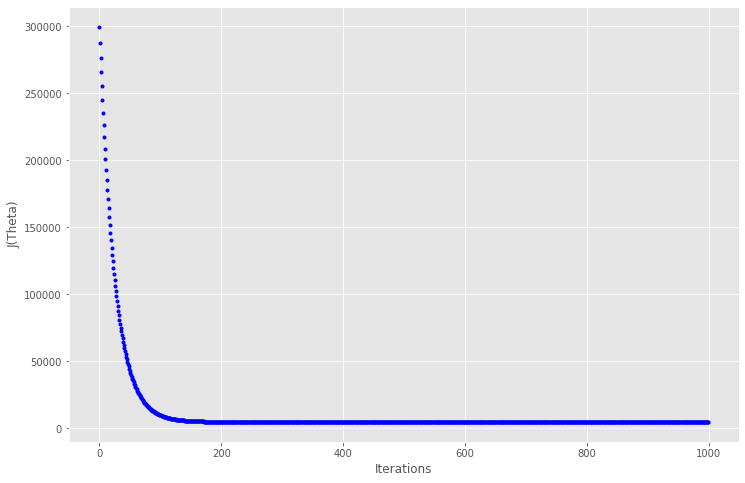

In [60]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization. Let us zoom in in the segment up to iteration 200 and see the curve

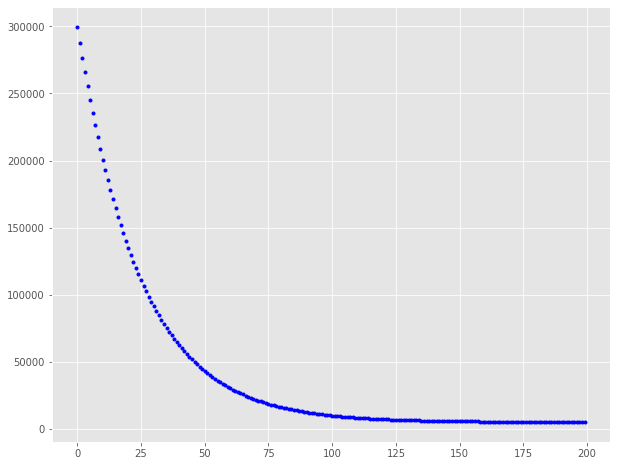

In [61]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

It is worth to note that the cost drops faster initially and then slows down.

It would be great to see the effect of different learning rates and iterations together.
Let us build a function which can show the effects together and also show how gradient decent actually is working

In [62]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

Plot the graphs for different iterations and learning rates combination

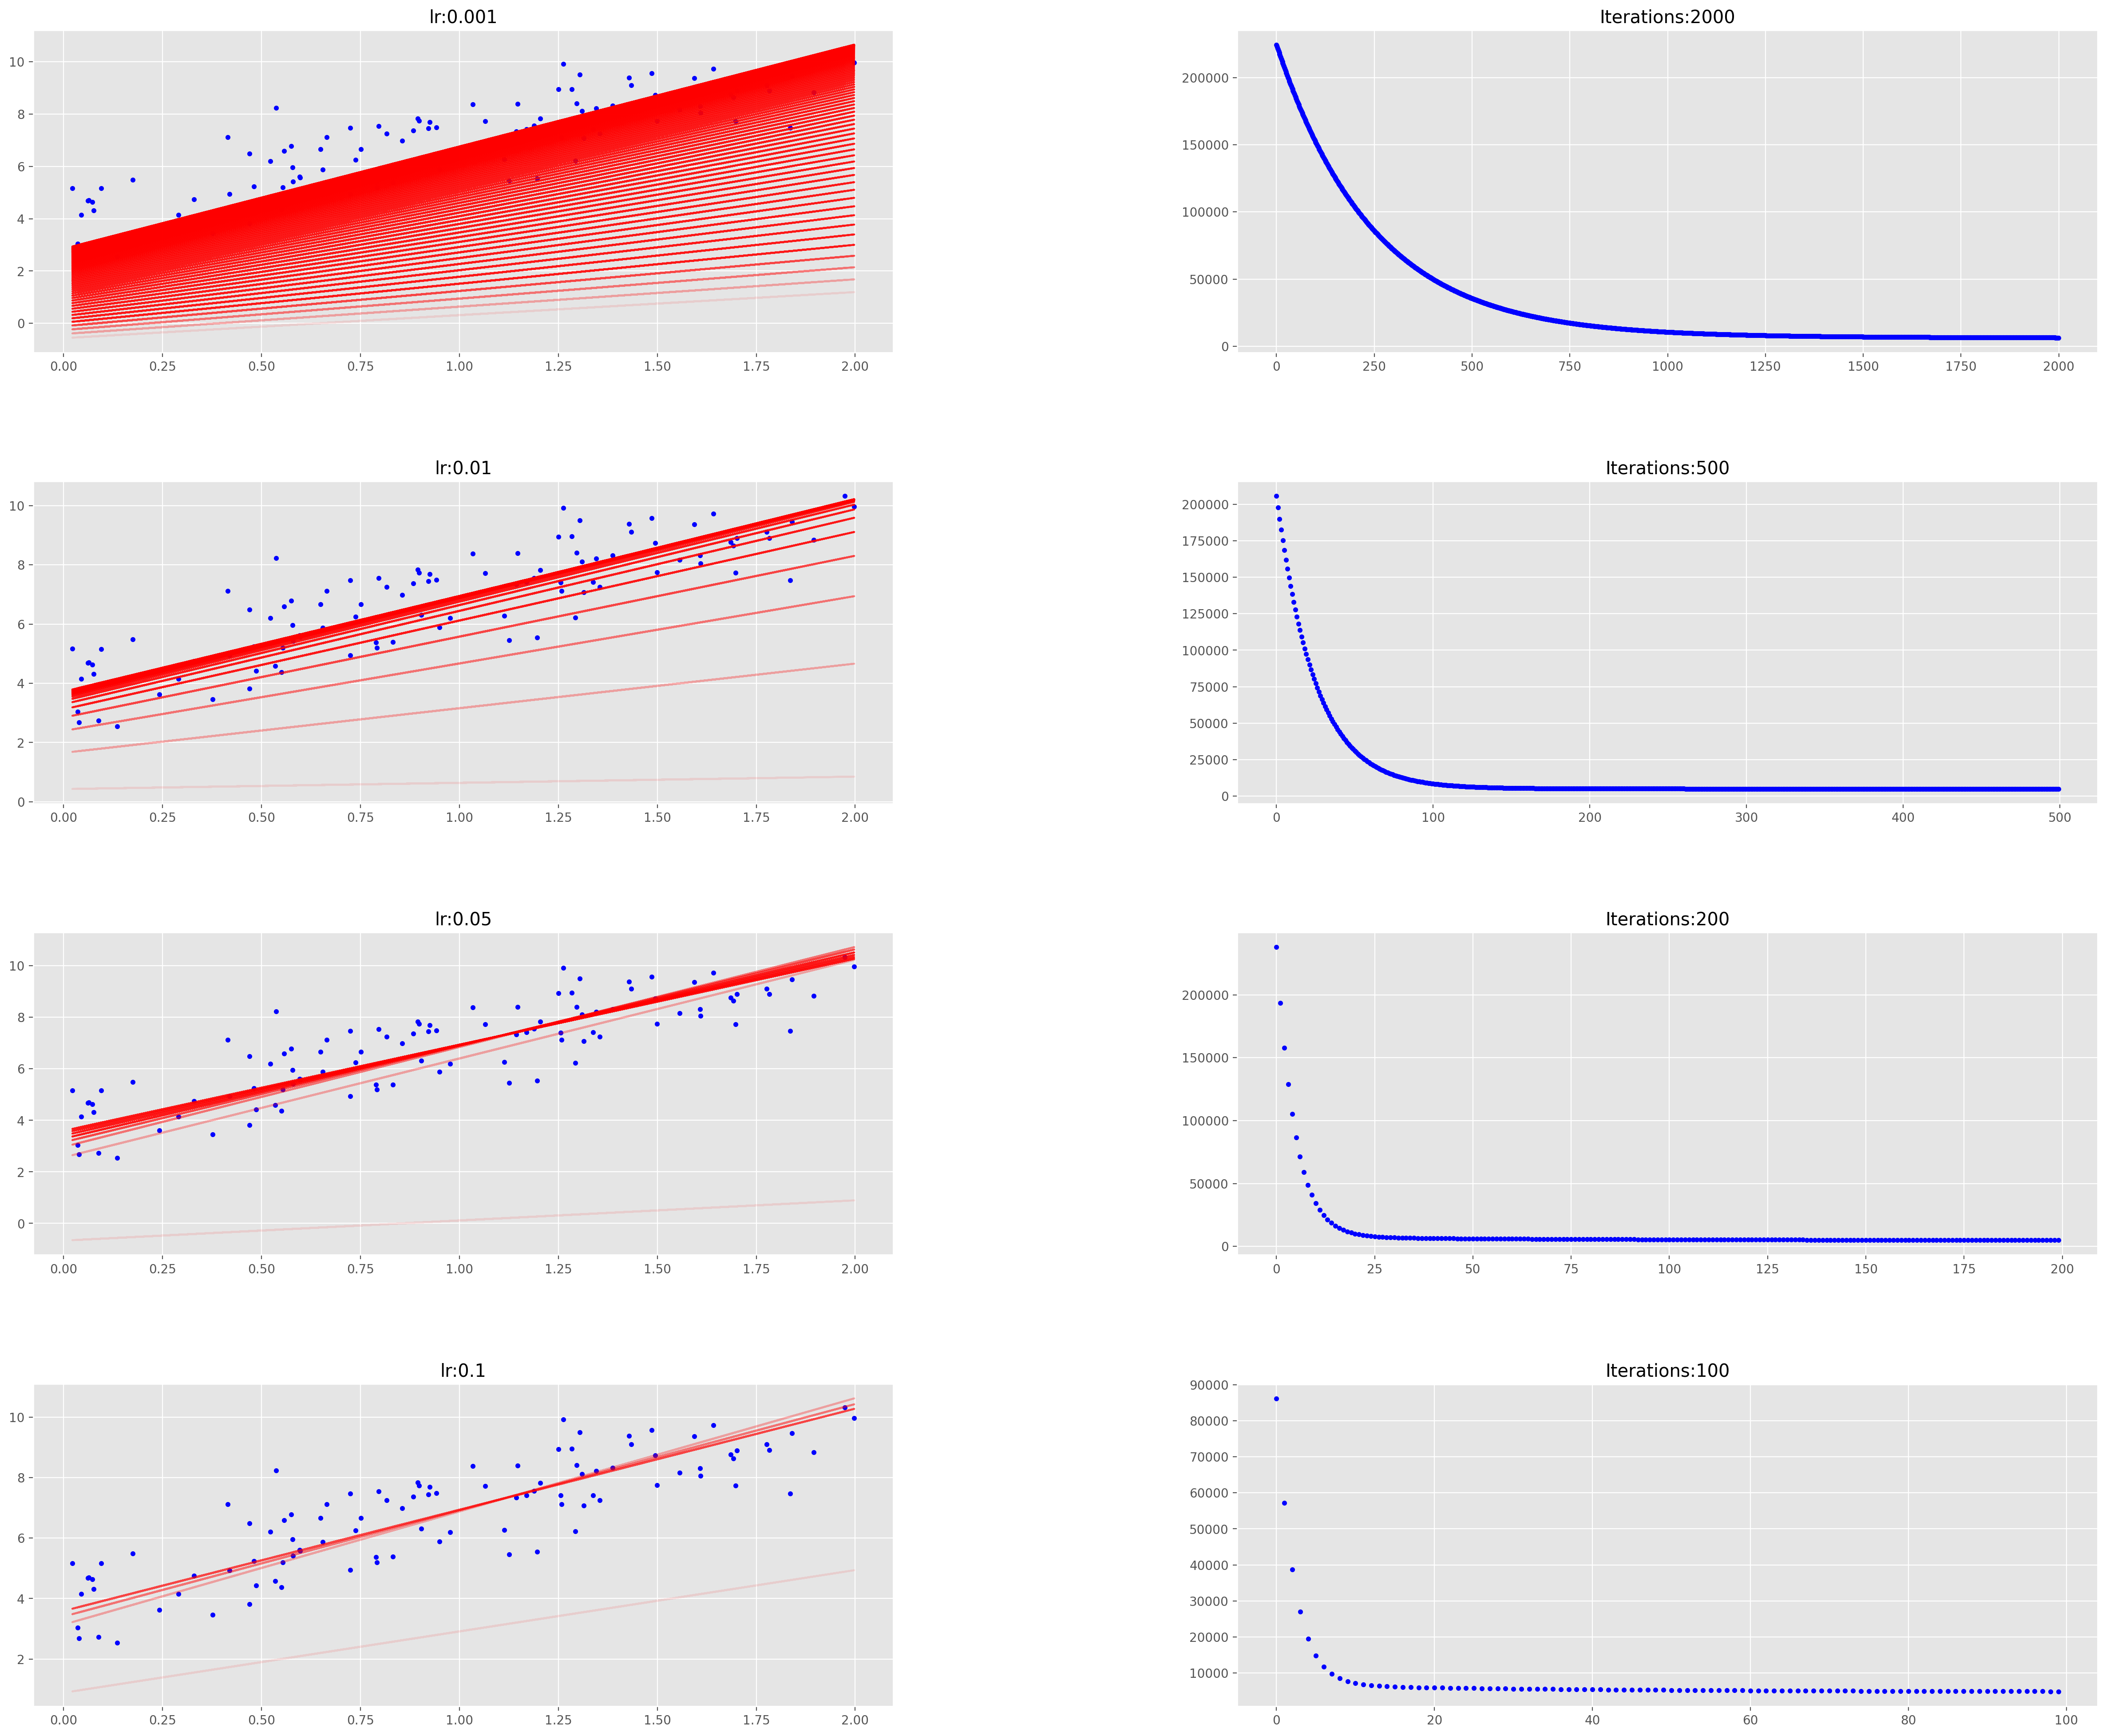

In [63]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)

See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value (with a deepening in red colour).

You can always plot Indiviual graphs to zoom in:

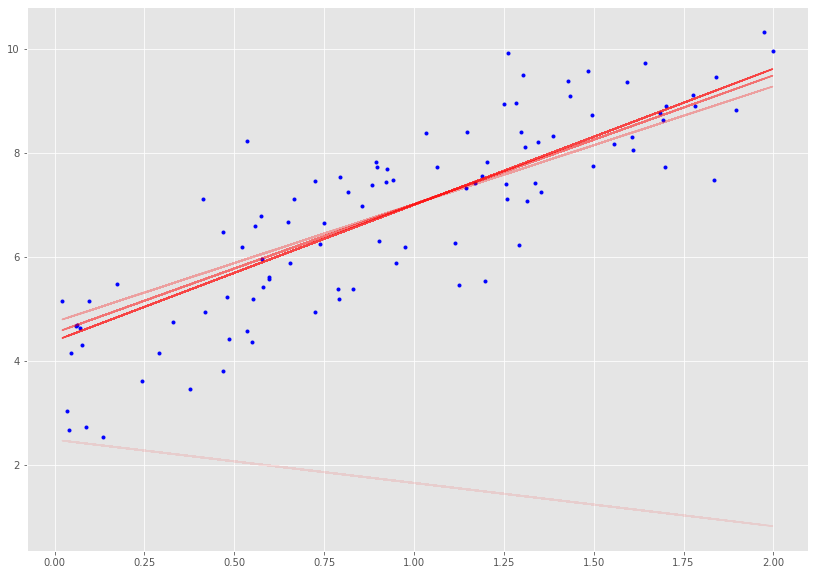

In [64]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 6.2 Application of Gradient Descent in Python

Most of the time, we do not have to implement gradient descent on our own, as it is already part of a Python package, we use.

For instance, Scikit-learn provided a [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) for linear models.


✍️ **Task**

Find out in what respect Stochastic Gradient Descent differs from the Gradient Descent, we see above.





In [65]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data).
# https://en.wikipedia.org/wiki/Stochastic_gradient_descent

### Hyper-Parameters for Training

If we use a pre-made training function, we still can make several decisions that determine the trainings success. For instance [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) offers parameters for both: learning rate and maximum number of iterations.

Next, we use the function to train the model, with the squared error as the loss function and set the intercept of the linear model to true. We use the data from the previous task.



In [66]:
y[0:5]

array([[7.24964812],
       [9.38515926],
       [5.96144152],
       [9.10578551],
       [9.57033099]])

In [67]:
X[0:5]

array([[1.35432898],
       [1.42806662],
       [0.57779585],
       [1.43441615],
       [1.485362  ]])

In [68]:
import numpy as np
from sklearn.linear_model import SGDRegressor

# We use the model SGDRegressor from sklearn instead of the basic linear regression model
# We can set the number of iterations and the learning rate and add an intercept to the model
#lin_reg = LinearRegression(fit_intercept=True)
reg = SGDRegressor(alpha=0.0001, max_iter=1000,  fit_intercept=True)

# Training the model
#lin_reg.fit(X, np.ravel(y))
reg.fit(X, np.ravel(y)) # we need the ravel, to make a one dimension numpy array out of y 



SGDRegressor()

In [69]:
print(y.shape)
print(np.ravel(y).shape)

(100, 1)
(100,)


We can use the trained Model to make a prediction with the model:

(0.0, 2.0, 0.0, 15.0)

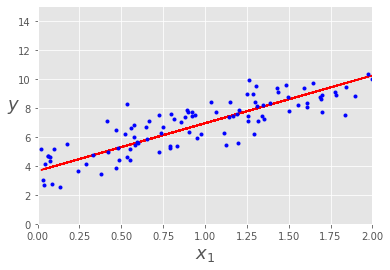

In [70]:
y_hat = reg.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### 6.3 Learning Curves

Next, we dive deeper into the accuracy and training curves of different models. Therefore, we look what happens, if we train three models with different degrees of flexibility on the same data.

## Accuracy Measures

We stored the real values of $y$ in `y` and the the predictions $\hat{y}$ in `y_hat`. To evaluate how good our predictions are, we can either look at the plots or calculate accuracy measures.


✍️ **Task**

Write three functions, that take the real and the predicted values of the predicted variables `y_true`and `y_pred` and calculate the following error measures:

* Mean Squared Error:  `mse(y_true, y_pred)`
$$\text{MSE}=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y_i})^2$$


* Mean Absolute Error: `mae(y_true, y_pred)`
$$\text{MAE}=\frac{1}{n}\sum^n_{i=1}|y_i-\hat{y_i}|$$

* Mean Absolute Percentage Error: `mape(y_true, y_pred)`

$$\text{MAPE}=\frac{1}{n}\sum^n_{i=1}|\frac{y_i-\hat{y_i}}{y_i}|$$

*Hint*: You can solve this by creating loops and conditionals, but it will be much more convenient to use the following numpy functions `np.sum()`,  `np.abs()`,  `np.square()`, and  `np.divide()`. You can find some examples on how to use them above. 


In [71]:
# Ensure same dimensions of y and y_hat
y = np.ravel(y)

In [72]:
# Add solution to this cell and evaluate
def mse(y, y_hat):

SyntaxError: incomplete input (1551181082.py, line 2)

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# mean_squared_error

def mse(y, y_hat):

  n_obs = len(y)
  return np.sum(np.square(y-y_hat))/n_obs
mse(y, y_hat)

1.0777631720907135

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# mean_absolute_error

def mae(y, y_hat):
  n_obs = len(y)
  return np.sum(np.abs(y-y_hat))/n_obs
mae(y, y_hat)

0.7807622813562689

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# mean_absolute_percentage_error

def mape(y, y_hat):
  n_obs = len(y)
  return np.sum(np.divide(np.abs(y-y_hat),y))/n_obs
mape(y, y_hat)

0.11817988236850048

✍️ **Task**

Use the [prebuild-functions](https://scikit-learn.org/stable/modules/model_evaluation.html) from Scikit-Learn, to see if Your calculations work.



In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_squared_error(y_true=y, y_pred = y_hat)

1.1491893396325297

In [ ]:
mean_absolute_error(y_true=y, y_pred = y_hat)

0.8918534836281076

In [ ]:
mean_absolute_percentage_error(y_true=y, y_pred = y_hat)

0.14478998498474527

🤓 **Task**

Find out in what happens if You set the intercept of the model from 6.2 to false. Do the errors increase or decrease? Is the model more or less flexible?

`reg = SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=1000,  fit_intercept=True)`

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
import numpy as np
from sklearn.linear_model import SGDRegressor

# Always scale the input. The most convenient way is to use a pipeline.
reg = SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=1000,  fit_intercept=False)
reg.fit(X, np.ravel(y))

SGDRegressor(fit_intercept=False)

(0.0, 2.0, 0.0, 15.0)

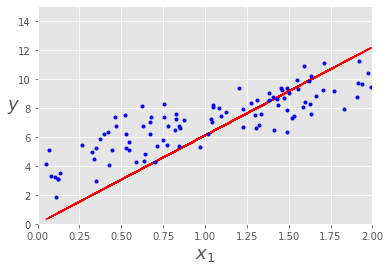

In [ ]:
y_hat = reg.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

In [ ]:
mean_squared_error(y_true=y, y_pred = y_hat)

4.3741553152506985

In [ ]:
mean_absolute_error(y_true=y, y_pred = y_hat)

1.7144129403512647

In [ ]:
mean_absolute_percentage_error(y_true=y, y_pred = y_hat)

0.2830367575604017

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# The model is less flexible, so the error is higher

### Learning Curves of Models with different Flexibility

#### Creation of a new Data Set

Next, we linear data set with random noise as we did above. Note, that the data has an intercept ($10$) and a negative slope ($-4$). 

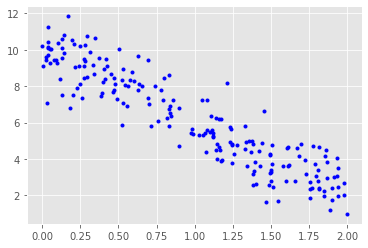

In [ ]:
np.random.seed(1)
X = 2 * np.random.rand(200,1)
y = 10 - 4 * X+np.random.randn(200,1)
y = y[:,0]
plt.plot(X,y,'b.')

#### Simple Model: Linear Model without Intercept

First, we train a very simple model, that is a linear model, without an intercept. As there is only one parameter ($\beta_1$ which is the slope of the line), the model is very inflexible.


In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor

# Always scale the input. The most convenient way is to use a pipeline.
reg_without_intercept = SGDRegressor(alpha=0.0001, max_iter=1000,  fit_intercept=False)
reg_without_intercept.fit(X, np.ravel(y))

SGDRegressor(fit_intercept=False)

If we use the model to make a in-sample prediction (red line) in the training set, we see that the model struggles to fit the data (has a high bias).

(0.0, 2.0, 0.0, 15.0)

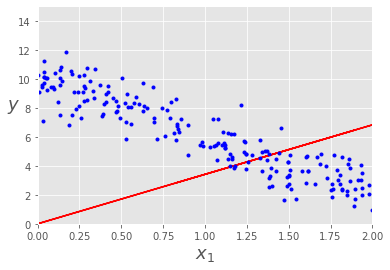

In [ ]:
y_hat = reg_without_intercept.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

Next, we plot the learning curve. Therefore, we use the `learning_curve()` function from sklearn. Take a look at the parameters of the function. 

First, we pass the pre-trained model (`reg_without_intercept`) and the data we have (`X` and `y`).
The `cv` argument indicates, that the function performs a cross-valdiation on the data (i.e., it splits its multiple times, trains the model and evaluates the accuracy scores on each of the training and test sets. We can also decided what accuracy measure to use. In this case (`scoring = "neg_root_mean_squared_error"`) we decide fpr the $RMSE$. Note, that for consistency with other metrics the function returns the negative $RMSE$. We also tell the function to return the times needed for training (`return_times=True`) for further analysis.

Besides the times, the model returns the sizes of training sets it used and the accuracy values of all cross-validations.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg_without_intercept, X, y, cv=5,return_times=True, scoring = "neg_root_mean_squared_error")

✍️ **Task**

- See what the sizes of the training sets the model evaluates.
- 🤓 Do You expect the variance of in-sample $RMSE$ to rise or fall with increasing size of the test set?

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
train_sizes

array([ 16,  52,  88, 124, 160])

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
for test_results in train_scores:
  print(np.var(test_results))
# with larger training sets, the results become more stable, hence, the variance lessens

0.02901617188925603
0.05696617355712622
0.024486773819719254
0.019957374998129267
0.012265130585980387


To plot the learning curve, we plot the average, positive $RMSE$ over the size of the training data. The average performance of the training data is the red line. The average performance on the test data is the blue line.

Text(0, 0.5, 'RMSE')

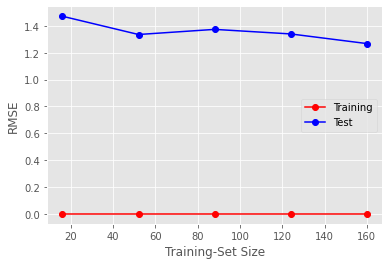

In [ ]:
plt.plot(train_sizes, -np.mean(train_scores,axis=1),'ro-') # red
plt.plot(train_sizes, -np.mean(test_scores,axis=1),'bo-') # blue

plt.legend(['Training', 'Test'])
plt.xlabel('Training-Set Size')
plt.ylabel('RMSE')

We see, that the training error are quite large if we use only parts of the data and improve with additional data. The same happens  with the test error. If we take more than 80 observations in the training data, there is no improvement is any of the error.

At first glance, the learning curve looks very promising. However, by looking at the plot above, we see that the model provides a very poor fit for the data. The large overall $RMSE$ around 5.45 in the best case in an indicator for that. 

Usually we expect, that the test set error is higher than the training error. However, in this example we see that this must not be the case in very bad models.

#### Linear Model with Intercept

Next, we create a more flexible model by adding an intercept to the linear model.

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor

# Always scale the input. The most convenient way is to use a pipeline.
reg_with_intercept = SGDRegressor(loss='squared_error', alpha=0.0001, max_iter=1000,  fit_intercept=True)
reg_with_intercept.fit(X, np.ravel(y))

SGDRegressor()

(0.0, 2.0, 0.0, 15.0)

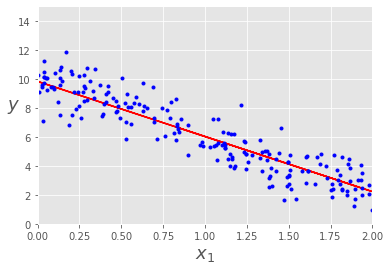

In [ ]:
y_hat = reg_with_intercept.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

Now, we can see that the model (red line) fits the data much better.

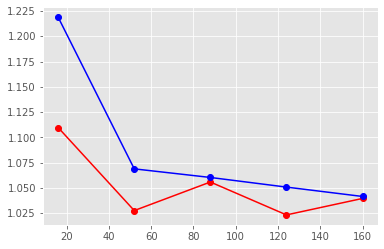

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(reg_with_intercept, X, y, cv=5,return_times=True, scoring = "neg_root_mean_squared_error")

plt.plot(train_sizes, -np.mean(train_scores,axis=1),'ro-')
plt.plot(train_sizes, -np.mean(test_scores,axis=1),'bo-')

plt.legend(['Training', 'Test'])
plt.xlabel('Training-Set Size')
plt.ylabel('RMSE')

We see a typical learning curve, of a good model. Both, the test- and training error sink to a low level (close on 1.025) if we feed the model with enough data. Not only, do both error shrink, but the test error come very close to the training error.

#### Model with high Flexibility (Decision Tree)

Next, we introduce a very flexible model. We will learn about decision trees later in the lecture. Now, it is only important, that they are very good in fitting the training data.

In [ ]:
import numpy as np
from sklearn import tree

# Always scale the input. The most convenient way is to use a pipeline.
tree_model = tree.DecisionTreeRegressor(max_depth =50, random_state = 1)
tree_model = tree_model.fit(X,y)

(0.0, 2.0, 0.0, 15.0)

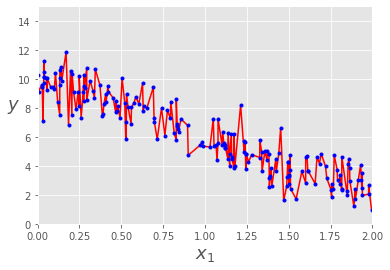

In [ ]:
X_sort = X.copy()
X_sort[:,0].sort()
y_hat = tree_model.predict(X_sort)
plt.plot(X_sort,y_hat,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

We see, that the model can include any point in the data and creates a perfect in-sample fit.

Text(0, 0.5, 'RMSE')

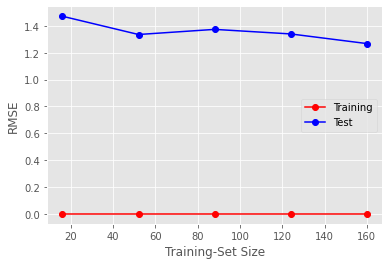

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(tree_model, X, y, cv=5,return_times=True, scoring = "neg_root_mean_squared_error")

plt.plot(train_sizes,-np.mean(train_scores,axis=1),'ro-')
plt.plot(train_sizes,-np.mean(test_scores,axis=1),'bo-')
plt.legend(['Training', 'Test'])
plt.xlabel('Training-Set Size')
plt.ylabel('RMSE')

We also see this in the learning curve. No matter how large the training set ist, the model will always fit the data perfectly. Still, the test set error remains very large. We say the model over-fits the data or does not generalize well on unseen data.

✍️ **Task**

The following cell implements a neural network as a prediction model. Without knowing anything about the model and only looking at the learning curve: How do You judge the model?

- is the overall performance good compared to the other models?
- are there any signs of over-fitting?
- would the model profit from more data?

In [ ]:
np.random.seed(1)
X = 2 * np.random.rand(200,1)
y = 10 - 4 * X+np.random.randn(200,1)
y = y[:,0]


from sklearn.neural_network import MLPRegressor

# Always scale the input. The most convenient way is to use a pipeline.
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 500,activation = 'relu',
                       solver = 'adam')
mlp_reg.fit(X, y)




MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=500)

c:\Users\JLHUBER\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JLHUBER\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JLHUBER\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'RMSE')

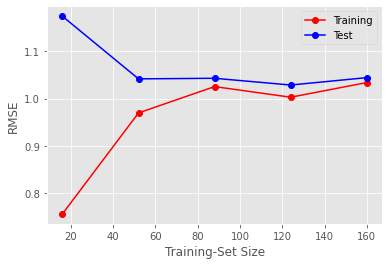

In [ ]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(mlp_reg, X, y, cv=5,return_times=True, scoring = "neg_root_mean_squared_error")

plt.plot(train_sizes,-np.mean(train_scores,axis=1),'ro-')
plt.plot(train_sizes,-np.mean(test_scores,axis=1),'bo-')

plt.legend(['Training', 'Test'])
plt.xlabel('Training-Set Size')
plt.ylabel('RMSE')


(0.0, 2.0, 0.0, 15.0)

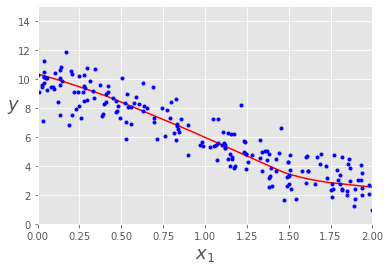

In [ ]:
X_sort = X.copy()
X_sort[:,0].sort()
y_hat = mlp_reg.predict(X_sort)
plt.plot(X_sort,y_hat,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)